# Classes

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import pickle
from astropy.io import fits 
%matplotlib widget 


[Link to Python Class documentation](https://docs.python.org/3/tutorial/classes.html)

When to use a class:
1) you want to define several functions to perform a specific task, and you want to repeatedly use these functions in a self-consistent way.
2) your functions use shared parameters; you want each function to use the same values every time.
3) you want to use these functions and these variables in different Jupyter notebooks without rewriting them every time - and avoiding dangerous copying & pasting.
4) if you spot an error in your data analysis, you only need to fix the error in one place and rerun all the analysis (also on a different Jupyter notebook) by just recalling the updated class.


## Class definition syntax

```python
class ClassName:
    <statement 1>
    <statement 2>
    ...
    <statement N>
```

## Class objects

Class objects support two kinds of operations: attribute references and instantiation.

*Attribute references* use the standard syntax as for all attribute references in Python: `obj.name`. Let's take this example:

In [2]:
class MyClass:
    """A simple example class"""
    internal_variable = 12345

    def print_hello(self):
        return 'hello world'

You can retrieve the value of `internal_variable` and use the function `print_hello` directly by calling the class:

In [3]:
print(MyClass.internal_variable)
MyClass.print_hello(MyClass)

12345


'hello world'

Notice the argument `self` of the class: it means that the function requires the class itself as an argument. 

*Class instantiation* uses function notation. 
The example below creates a new instance of the class and assigns this object to the local variable `first_class`. The same action is repeated using the variable `second_class`.

In [4]:
first_class = MyClass()
second_class = MyClass()

This action is called **class instantiation**. \
We have created two Python objects, called `first_class` and `second_class`, which will have all the attributes and functions of the original class but will work independently. For example, we can change the value of the `internal_variable` of one of the two objects without affecting the other:

In [5]:
second_class.internal_variable = 67890
print('first_class internal variable value:', first_class.internal_variable)
print('second_class internal variable value:', second_class.internal_variable)

first_class internal variable value: 12345
second_class internal variable value: 67890


A variable inside a class takes the name of **data attribute** or simply **attribute**
A function defined inside a class takes the name of **method**

When calling a method of an instance object, you don't need to specify the `self` argument anymore, as the class will know to *take itself* as an argument:

In [6]:
print('running class method form the instance object:')
second_class.print_hello()


running class method form the instance object:


'hello world'

## Class initialization
Classes support a special kind of method that is automatically called every time you create a new class instance. This *initialization* method is defined by the name `__init__`

Let's analyze this example:

In [7]:
class MySecondClass:
    def __init__(self, x_input, y_input):
        self.x_pos = x_input
        self.y_pos = y_input

When creating a new object using our class, the `__init__` method is automatically invoked. \
In this example, `__init__` requires two arguments other than the `self` one, so we have to provide them when doing *class instantiation* to avoid an error: 

In [8]:
print('wrong class instantiation')
new_class = MySecondClass()

wrong class instantiation


TypeError: __init__() missing 2 required positional arguments: 'x_input' and 'y_input'

In [9]:
print('correct class instantiation (no output error)')
new_class = MySecondClass(258, 76)

correct class instantiation (no output error)


The two arguments `x_input, y_input` are now saved as attributes of the class `self.x_pos, self.y_pos`. Mind the difference: 
1) When defining a new method, you can recall these attributes using the `self.` appendix. 
2) When calling the attributes from an instance object, you call them directly using the name of the object

If you change the class, you must do a new instance, as in the example below.

In [12]:
class MySecondClass:
    def __init__(self, x_input, y_input):
        self.x_pos = x_input
        self.y_pos = y_input
    def print_positon(self):
        print('attributes called from a class method', self.x_pos, self.y_pos)
    def change_position(self, x_new, y_new): 
        self.x_pos = x_new
        self.y_pos = y_new
        
new_class =  MySecondClass(258, 76)
new_class.print_positon()

print('attributes called from instance object:', new_class.x_pos, new_class.y_pos )

attributes called from a class method 258 76
attributes called from instance object: 258 76


You can write a method to change one or more attributes. 
In order to work, the method must get `self` as the argument, and the attributes to be changed must be referenced as `self.`

```python
class MySecondClass:

    def change_position(self, x_new, y_new): 
        self.x_pos = x_new
        self.y_pos = y_new
```

For example, defining the method like in the example below would not change anything inside the instance object, and it would throw an error when the method is called:
```python
class WrongClass:
    ...
    def wrong_method(x_new, y_new): 
        x_pos = x_new
        y_pos = y_new
```

All the methods called after the `change_position` method will use the updated values for `self.x_pos` and `self_y_pos`:

In [13]:
new_class.print_positon()
new_class.change_position(789, 123)
new_class.print_positon()


attributes called from a class method 258 76
attributes called from a class method 789 123


As in the example below, you can change an attribute without going through a method. \
All the methods called after the change will use the updated value:

In [14]:
new_class.x_pos = 456
new_class.print_positon()


attributes called from a class method 456 123


# Practical example: aperture photometry

Let's make our Class to perform aperture photometry with different apertures and on several stars effortlessly. 

**Note** in the following I will use this notation: 
- Missing parts `... fill ` must be filled by you 
- Skipped parts `... skipped`  have already been explained early, they have been removed for the sake of readability 

### Initialization
As this is a work in progress, we will call our class `TemporaryAperturePhotometry` for now.  We initialize our class by providing some constants that will be the same regardless of the star under analysis. Keep in mind that you can always change these attributes if you run the analysis on a different folder. 

In [23]:
class TemporaryAperturePhotometry:
    def __init__(self):
        #self.data_path = './data/'
        
        self.readout_noise = 7.4  # [e] photoelectrons
        self.gain = 1.91 # [e/ADU]
        
        self.bias_std = 1.3 # [e] photoelectrons
        self.median_bias = pickle.load(open('output_files/median_bias.p', 'rb'))
        self.median_bias_errors = pickle.load(open('output_files/median_bias_error.p', 'rb'))
        # put the value here if you decided to use a constant value
        self.median_normalized_flat = pickle.load(open('output_files/median_normalized_flat.p', 'rb'))
        self.median_normalized_flat_errors = pickle.load(open('output_files/median_normalized_flat_errors.p', 'rb'))
        
        self.science_path = '../data/'
        self.science_list = np.genfromtxt(self.science_path + 'data.list', dtype=str)
        self.science_size = len(self.science_list)
        
        ylen, xlen  = np.shape(self.median_bias)
        X_axis = np.arange(0, xlen, 1)
        Y_axis = np.arange(0, ylen, 1)
        self.X, self.Y = np.meshgrid(X_axis, Y_axis)


In [24]:
target_star = TemporaryAperturePhotometry()
print(target_star.science_list[:20])

['AF578220.fits' 'AF578221.fits' 'AF578222.fits' 'AF578223.fits'
 'AF578224.fits' 'AF578225.fits' 'AF578226.fits' 'AF578227.fits'
 'AF578228.fits' 'AF578229.fits' 'AF578230.fits' 'AF578231.fits'
 'AF578232.fits' 'AF578233.fits' 'AF578234.fits' 'AF578235.fits'
 'AF578236.fits' 'AF578237.fits' 'AF578238.fits' 'AF578239.fits']


Since the calibration files and the science files have the same size, we can define here the meshgrid arrays used later on to compute the distance of each pixel from our star. 

```python
class TemporaryAperturePhotometry:
    def __init__(self):
        ... skipped
        ylen, xlen  = np.shape(self.median_bias)
        X_axis = np.arange(0, xlen, 1)
        Y_axis = np.arange(0, ylen, 1)
        self.X, self.Y = np.meshgrid(X_axis, Y_axis)
```
In this example, I decided to store as attributes of the class only the meshgrid arrays, and not the intermediate steps required for their computation.


### Defining our `aperture_photometry` method
After checking that our class is loading the necessary ingredients to correct the science frame, we start building our aperture_photometry. 
For now, it's just an empty function. 
```python 
	def aperture_photometry(self):
```
We will fill this function with all the operations we have done during the previous lectures. Be sure you performed all these operations correctly!

To start, open the Jupiter notebook dedicated to correcting the science frame. You can see that we iterated over the science list, opening a new frame at each iteration. We can do the same here, this time using the function `enumerate` to get the image index

```python
class TemporaryAperturePhotometry:
    def __init__(self):
        self.data_path = './group00_HAT-P-44_20210413/'
        ... skipped
    
    def aperture_photometry(self):
        for ii_science, science_name in enumerate(self.science_list):
            science_fits = fits.open(self.science_path + science_name)
            science_data = science_fits[0].data * self.gain # save the data from the first HDU 
            science_fits.close()
```

In [27]:
class TemporaryAperturePhotometry:
    def __init__(self):
        #self.data_path = './data/'
        
        self.readout_noise = 7.4  # [e] photoelectrons
        self.gain = 1.91 # [e/ADU]
        
        self.bias_std = 1.3 # [e] photoelectrons
        self.median_bias = pickle.load(open('output_files/median_bias.p', 'rb'))
        self.median_bias_errors = pickle.load(open('output_files/median_bias_error.p', 'rb'))
        # put the value here if you decided to use a constant value
        self.median_normalized_flat = pickle.load(open('output_files/median_normalized_flat.p', 'rb'))
        self.median_normalized_flat_errors = pickle.load(open('output_files/median_normalized_flat_errors.p', 'rb'))
        
        self.science_path = '../data/'
        self.science_list = np.genfromtxt(self.science_path + 'data.list', dtype=str)
        self.science_size = len(self.science_list)
        
        ylen, xlen  = np.shape(self.median_bias)
        X_axis = np.arange(0, xlen, 1)
        Y_axis = np.arange(0, ylen, 1)
        self.X, self.Y = np.meshgrid(X_axis, Y_axis)

    def aperture_photometry(self):
        self.airmass = np.empty(self.science_size)
        self.exptime = np.empty(self.science_size)
        self.julian_date = np.empty(self.science_size)
        
        for ii_science, science_name in enumerate(self.science_list):
            science_fits = fits.open(self.science_path + science_name)
            science_data = science_fits[0].data * self.gain # save the data from the first HDU 
            science_fits.close()

### Extracting information from the header
Since we are already opening our science fits file, this is an excellent moment to retrieve and store helpful information from the header. 
You have to perform two steps to save your output correctly:
1) *outside* the iterative `for` cycle, you have to create an empty array with a size equal to the number of images for *each* information you want to retrieve from the header 
2) *inside* the cycle, you have to save the values extracted from the `ii_science`-th  frame in the corresponding position inside the array 
Note that you have to read the header *before* closing the fits file
Remeber to store the information as *class attributes*, by anteponing `self.` to the name of the variable

```python
    def aperture_photometry(self):
        self.airmass = np.empty(self.science_size)
        self.exptime = np.empty(self.science_size)
        self.julian_date = np.empty(self.science_size)
        
        for ii_science, science_name in enumerate(self.science_list):
            science_fits = fits.open(self.science_path + science_name)
            
            #You must read the info from the header before closing the file
            self.airmass[ii_science] = science_fits[0].header['AIRMASS']
            self.exptime[ii_science] = science_fits[0].header['EXPTIME']
            self.julian_date[ii_science] = science_fits[0].header['JD']
            
            science_data = science_fits[0].data * self.gain # save the data from the first HDU 
            science_fits.close()
```

### Correcting the raw science frame for bias and flat
Let's define a method that takes the raw science frame in input and gives the corrected science frame and the associated errors in output. \

1) define the method inside the class:
```python
    def correct_science_frame(self, science_frame):
        science_debiased = science_data - self.median_bias
        science_corrected = science_debiased / self.median_normalized_flat

        ## Error associated to the science corrected frame
        science_debiased_errors = ... fill
        science_corrected_errors = ... fill

        return science_corrected, science_corrected_errors
```
    
2) open the Jupyter notebook where you performed the science correction, and copy the commands to correct the science frame for bias and flat. 

```python
    def correct_science_frame(self, science_frame):
        science_debiased = science_frame - self.median_bias
        science_corrected = science_debiased / self.median_normalized_flat

        ## Error associated to the science corrected frame
        science_debiased_errors = ... fill
        science_corrected_errors = ... fill

        return science_corrected, science_corrected_errors
```

3) remeber to add the `self.` appendix whenever necessary!!

When the method `correct_science_frame` is ready, remeber to call it from inside the `aperture_photometry` method:
```python
    def aperture_photometry(self, science_frame):
    ... skipped
        for ii_science, science_name in enumerate(self.science_list):
            ... skipped
            science_data = science_fits[0].data * self.gain 
            # save the data from the first HDU 
            science_fits.close()
            
            science_corrected, science_corrected_errors = \                  
            self.correct_science_frame(science_data)
    
```

Inside the class, the ordering of the function is *not* relevant.

### Defining the sky inner radius, sky outer radius, aperture photometry
Before computing the centroid and performing aperture photometry, we need to provide the following:
1) the `sky_inner_radius` and `sky_outer_radius` to define the annulus for the measurement of the sky background;
2) the `sky_inner_radius` can be used to define the maximum radius for the centroid measurement;
3) the `aperture_radius` for the aperture photometry
4) an initial guess for the position of the star, `x_initial` and `y_initial`
We can make a new method to store these values as attributes of the object, or provide them as arguments of our `aperture_photometry` function. Each method will work equally well.

First approach (ised for the rest of this notebook):
```python
def provide_aperture_parameters(self, sky_inner_radius, sky_outer_radius, aperture_radius, x_initial, y_initial):
    self.sky_inner_radius = sky_inner_radius 
    self.sky_outer_radius = sky_outer_radius 
    self.aperture_radius = aperture_radius 
    self.x_initial = x_initial
    self.y_initial = y_initial
```

Second approach:
```python
def aperture_photometry(self, sky_inner_radius, sky_outer_radius, aperture_radius, x_initial, y_initial):
    self.sky_inner_radius = sky_inner_radius 
    self.sky_outer_radius = sky_outer_radius 
    self.aperture_radius = aperture_radius 
    ... skipping
```


### Incorporating the centroid algorithm
1) Take the algorithm to compute the centroid posiiton (e.g., the one with the maximum numbe rof iterations) and encapsulate it inside a method, without forgetting the `self` argument
2) yo have to rpovide the scinece frame in input (as an argument), so you can repeat the calculation after subtracting the sky background
2) You can provide the maximum number of iterations `maximum_number_of_iterations` as an argument, with a default value
3) The method must provide in output the refined coordinates of the senter

```python
    def compute_centroid(self, science_frame, x_target_initial, y_target_initial, maximum_number_of_iterations=20)

        for i_iter in range(0, maximum_number_of_iterations):

            if i_iter == 0:
                # first iteration
                x_target_previous = x_target_initial
                y_target_previous = y_target_initial
            else:
                # using the previous result as starting point
                x_target_previous = x_target_refined
                y_target_previous = y_target_refined

            # 2D array with the distance of each pixel from the target star 
            target_distance = np.sqrt((self.X-x_target_previous)**2 + (self.Y-y_target_previous)**2)

            # Selection of the pixels within the inner radius
            annulus_sel = (target_distance < self.sky_inner_radius)

            # Weighted sum of coordinates
            weighted_X = np.sum(science_frame[annulus_sel]*self.X[annulus_sel])
            weighted_Y = np.sum(science_frame[annulus_sel]*self.Y[annulus_sel])

            # Sum of the weights
            total_flux = np.sum(science_frame[annulus_sel])

            # Refined determination of coordinates
            x_target_refined = weighted_X/total_flux
            y_target_refined = weighted_Y/total_flux

            percent_variance_x = (x_target_refined-x_target_previous)/(x_target_previous) * 100.
            percent_variance_y = (y_target_refined-y_target_previous)/(y_target_previous) * 100.
            # exit condition: both percent variance are smaller than 0.1%
            if np.abs(percent_variance_x)<0.1 and  np.abs(percent_variance_y)<0.1:
                  break

        return x_target_refined, y_target_refined
```

### Computing the sky background
Again, incorporate the sky background computation inside a function, following the same steps seen together during the lecture

```python
    def compute_sky_background(self, science_frame, x_pos, y_pos):
        target_distance = np.sqrt((self.X-x_pos)**2 + (self.Y-y_pos)**2)

        annulus_selection = (target_distance > self.sky_inner_radius) & (target_distance<=self.sky_outer_radius)

        sky_flux_average = np.sum(science_frame[annulus_selection]) / np.sum(annulus_selection)
        sky_flux_median = np.median(science_frame[annulus_selection])
        return sky_flux_average, sky_flux_error
```

### Aperture photometry

Final step is the computation of the aperture photometry, - last three lines of this example

```python
    ... skipped
    def aperture_photometry(self):
        self.airmass = np.empty(self.science_size)
        self.exptime = np.empty(self.science_size)
        self.julian_date = np.empty(self.science_size)
        
        self.aperture = np.empty(self.science_size)
        self.aperture_errors = np.empty(self.science_size)
        self.sky_background = np.empty(self.science_size)
        self.sky_background_errors = np.empty(self.science_size)
        
        for ii_science, science_name in enumerate(self.science_list):
            ... skipped

            self.sky_background[ii_science], sky_background_errors[ii_science] = \
                self.compute_sky_background(science_corrected, x_refined, y_refined)

            science_sky_corrected = science_corrected- self.sky_background[ii_science]
            ... fill: error associated with science_sky_corrected
            
            x_refined, y_refined = self.compute_centroid(science_sky_corrected,  x_refined, y_refined)

            target_distance = np.sqrt((self.X-x_refined)**2 + (self.Y-y_refined)**2)
            aperture_selection = (target_distance < self.aperture_radius)
            self.aperture[ii_science] =  np.sum(science_sky_corrected[aperture_selection])
            ... fill: error associated with the aperture photometry

            
```

In [36]:
class TemporaryAperturePhotometry:
    def __init__(self):
        #self.data_path = './data/'
        
        self.readout_noise = 7.4  # [e] photoelectrons
        self.gain = 1.91 # [e/ADU]
        
        self.bias_std = 1.3 # [e] photoelectrons
        self.median_bias = pickle.load(open('output_files/median_bias.p', 'rb'))
        self.median_bias_errors = pickle.load(open('output_files/median_bias_error.p', 'rb'))
        # put the value here if you decided to use a constant value
        self.median_normalized_flat = pickle.load(open('output_files/median_normalized_flat.p', 'rb'))
        self.median_normalized_flat_errors = pickle.load(open('output_files/median_normalized_flat_errors.p', 'rb'))
        
        self.science_path = '../data/'
        self.science_list = np.genfromtxt(self.science_path + 'data.list', dtype=str)
        self.science_size = len(self.science_list)
        
        ylen, xlen  = np.shape(self.median_bias)
        X_axis = np.arange(0, xlen, 1)
        Y_axis = np.arange(0, ylen, 1)
        self.X, self.Y = np.meshgrid(X_axis, Y_axis)

    #---------------------------------------------------------------------------------------------------
    # 1)
    def correct_science_frame(self, science_frame):
        science_debiased = science_frame - self.median_bias
        science_corrected = science_debiased / self.median_normalized_flat

        ## Error associated to the science corrected frame
        science_debiased_errors = np.sqrt(self.readout_noise**2 + self.bias_std**2 + science_debiased)
        science_corrected_errors = science_corrected * np.sqrt((science_debiased_errors/science_debiased)**2 + (self.median_normalized_flat_errors/self.median_normalized_flat)**2)
        
        return science_corrected, science_corrected_errors
    
    # 2)
    def compute_centroid(self, science_frame, x_target_initial, y_target_initial, maximum_number_of_iterations=20):

        for i_iter in range(0, maximum_number_of_iterations):

            if i_iter == 0:
                # first iteration
                x_target_previous = x_target_initial
                y_target_previous = y_target_initial
            else:
                # using the previous result as starting point
                x_target_previous = x_target_refined
                y_target_previous = y_target_refined

            # 2D array with the distance of each pixel from the target star 
            target_distance = np.sqrt((self.X-x_target_previous)**2 + (self.Y-y_target_previous)**2)

            # Selection of the pixels within the inner radius
            annulus_sel = (target_distance < self.sky_inner_radius)

            # Weighted sum of coordinates
            weighted_X = np.sum(science_frame[annulus_sel]*self.X[annulus_sel])
            weighted_Y = np.sum(science_frame[annulus_sel]*self.Y[annulus_sel])

            # Sum of the weights
            total_flux = np.sum(science_frame[annulus_sel])


            # Refined determination of coordinates
            x_target_refined = weighted_X/total_flux
            y_target_refined = weighted_Y/total_flux

            percent_variance_x = (x_target_refined-x_target_previous)/(x_target_previous) * 100.
            percent_variance_y = (y_target_refined-y_target_previous)/(y_target_previous) * 100.
            # exit condition: both percent variance are smaller than 0.1%
            if np.abs(percent_variance_x)<0.1 and  np.abs(percent_variance_y)<0.1:
                  break

        return x_target_refined, y_target_refined
    
    # 4)
    def compute_sky_background(self, science_frame, science_frame_err, x_pos, y_pos):
        target_distance = np.sqrt((self.X-x_pos)**2 + (self.Y-y_pos)**2)

        annulus_selection = (target_distance > self.sky_inner_radius) & (target_distance<=self.sky_outer_radius)

        sky_flux_average = np.sum(science_frame[annulus_selection]) / np.sum(annulus_selection)
        sky_flux_err_average = np.sum(science_frame_err[annulus_selection])/np.sum(annulus_selection)
        return sky_flux_average, sky_flux_err_average
    
    # --------------------------------------------------------------------------------------------------------------------------
    # Final Function for aperture photometry
    def aperture_photometry(self, sky_inner_radius, sky_outer_radius, aperture_radius, x_initial, y_initial):
        self.airmass = np.empty(self.science_size)
        self.exptime = np.empty(self.science_size)
        self.julian_date = np.empty(self.science_size)

        self.sky_inner_radius = sky_inner_radius 
        self.sky_outer_radius = sky_outer_radius 
        self.aperture_radius = aperture_radius 
        self.x_initial = x_initial
        self.y_initial = y_initial

        self.aperture = np.empty(self.science_size)
        self.aperture_errors = np.empty(self.science_size)
        self.sky_background = np.empty(self.science_size)
        self.sky_background_errors = np.empty(self.science_size)
        
        for ii_science, science_name in enumerate(self.science_list):
            science_fits = fits.open(self.science_path + science_name)
            
            #You must read the info from the header before closing the file
            self.airmass[ii_science] = science_fits[0].header['AIRMASS']
            self.exptime[ii_science] = science_fits[0].header['EXPTIME']
            self.julian_date[ii_science] = science_fits[0].header['JD']
            
            science_data = science_fits[0].data * self.gain # save the data from the first HDU 
            science_fits.close()

            # 1) step
            science_corrected, science_corrected_errors = self.correct_science_frame(science_data)

            #2) step
            x_refined, y_refined = self.compute_centroid(science_corrected,  self.x_initial, self.y_initial)
            
            #3) step
            self.sky_background[ii_science], self.sky_background_errors[ii_science] = self.compute_sky_background(science_frame=science_corrected,
                                                                                                                  science_frame_err=science_corrected_errors,
                                                                                                                  x_pos=x_refined, y_pos=y_refined)

            science_sky_corrected = science_corrected- self.sky_background[ii_science]
            science_sky_corrected_errors = np.sqrt(science_corrected_errors**2. + self.sky_background_errors[ii_science]**2.)
            

            target_distance = np.sqrt((self.X-x_refined)**2 + (self.Y-y_refined)**2)
            aperture_selection = (target_distance < self.aperture_radius)
            self.aperture[ii_science] =  np.sum(science_sky_corrected[aperture_selection])
            self.aperture_errors[ii_science] = np.sum(science_sky_corrected_errors[aperture_selection]) #da controllare
            
    

            

    


### Aperture photometry for your target and reference(s) stars
Below, you can see a **very basic** example of how to obtain the aperture photometry for your target star, one reference star, and compute the differential photometry

**HOMEWORK** \
You will need to convert JD to BJT_TDB!! You need to do it only for the JD array of the target star (the reference star will share the same time array), as we are interested in precise timing of the exoplanetary signal. You can perform the conversion by using the same script as in lecture 03 *science analysis*.

When your Object is completed and working, save it into a .py file and recall it in a new Jupyter Notebook to perform your final analysis of the TASTE dataset



In [37]:
from time import time
t0 = time()
target_star = TemporaryAperturePhotometry()
#first approach:
#target_star.provide_aperture_parameters(13, 18, 8, 258, 57)

#but we used the second :)
target_star.aperture_photometry(sky_inner_radius=13, sky_outer_radius=18, aperture_radius=8, x_initial=357.5, y_initial=37.6)
t1 = time()
print('elapsed_time=', t1-t0)

/tmp/ipykernel_12894/4187767869.py:28: RuntimeWarning: divide by zero encountered in divide
  science_corrected = science_debiased / self.median_normalized_flat
/tmp/ipykernel_12894/4187767869.py:28: RuntimeWarning: invalid value encountered in divide
  science_corrected = science_debiased / self.median_normalized_flat
/tmp/ipykernel_12894/4187767869.py:32: RuntimeWarning: divide by zero encountered in divide
  science_corrected_errors = science_corrected * np.sqrt((science_debiased_errors/science_debiased)**2 + (self.median_normalized_flat_errors/self.median_normalized_flat)**2)
/tmp/ipykernel_12894/4187767869.py:32: RuntimeWarning: invalid value encountered in multiply
  science_corrected_errors = science_corrected * np.sqrt((science_debiased_errors/science_debiased)**2 + (self.median_normalized_flat_errors/self.median_normalized_flat)**2)


elapsed_time= 113.41324663162231


In [39]:
from time import time
t0 = time()
reference_star = TemporaryAperturePhotometry()
#reference_star.provide_aperture_parameters(13, 18, 8, 183, 70)
reference_star.aperture_photometry(sky_inner_radius=13, sky_outer_radius=18, aperture_radius=8, x_initial=471.5, y_initial=91.0)
t1 = time()
print('elapsed_time=', t1-t0)

/tmp/ipykernel_12894/4187767869.py:28: RuntimeWarning: divide by zero encountered in divide
  science_corrected = science_debiased / self.median_normalized_flat
/tmp/ipykernel_12894/4187767869.py:28: RuntimeWarning: invalid value encountered in divide
  science_corrected = science_debiased / self.median_normalized_flat
/tmp/ipykernel_12894/4187767869.py:32: RuntimeWarning: divide by zero encountered in divide
  science_corrected_errors = science_corrected * np.sqrt((science_debiased_errors/science_debiased)**2 + (self.median_normalized_flat_errors/self.median_normalized_flat)**2)
/tmp/ipykernel_12894/4187767869.py:32: RuntimeWarning: invalid value encountered in multiply
  science_corrected_errors = science_corrected * np.sqrt((science_debiased_errors/science_debiased)**2 + (self.median_normalized_flat_errors/self.median_normalized_flat)**2)


elapsed_time= 66.55099654197693


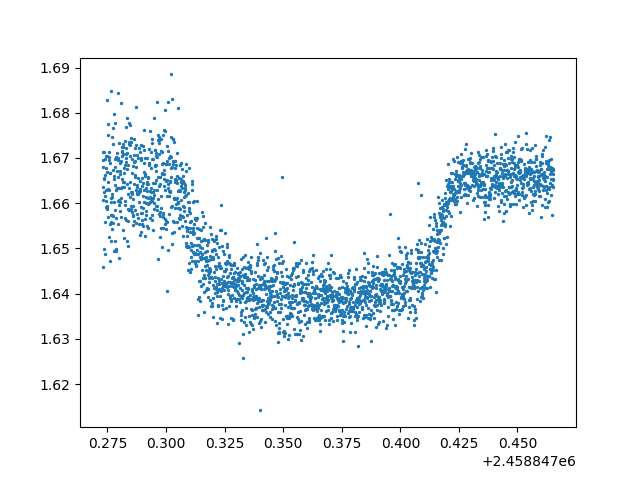

In [40]:
plt.figure()
plt.scatter(target_star.julian_date, target_star.aperture/reference_star.aperture, s=2)
plt.show()